**STATISTICS**

<ol>
<li><strike>Note histogram (octave folded, just 53-TET pitch class) Christos</strike></li>
<li><strike>Melodic line plot Christos</strike></li>
<li><strike>Return to tonic durations (how many notes did it take to return to tonic) OGUZ</strike></li> 
    <li><strike>Average length for all makams in a single plot OGUZ</strike></li> 
<li><strike>Return to tonic pitch ranges (what pitch range did the return to tonic cover) OGUZ</strike></li> 
<li><strike>General note rangeChristos</strike></li>
<li>Histogram of note durations Oguz</li> 
<li><strike>Histogram of position of tonic in measure (normalized) Christos</strike></li> 
<li><strike>Interval histogram Christos</strike></li>
<li>Note duration - maybe we can mention it as a limitation that they are not accounted for: we confident about what would be a cross-song (and therefore cross-time-signature and cross-tempo) consistent, useful characterization of the duration values</li>

**Questions**              

- RESEARCH QUESTION: What are other components of Turkish makam music that define the makam?

- Can makam music have time signature change?
- Is makam music actually strictly following the theoretical tonic for a specific makam?

<img src="fig1.png" width="350">

Figure from: *M. Kemal Karaosmanoğlu. A Turkish makam music symbolic database for music information retrieval: SymbTr. In Proceedings of 13th International Society for Music Information Retrieval Conference (ISMIR), pages 223–228, 2012.*

In [1]:
# Code modified from https://github.com/burakuyar/Tools/blob/master/musicxml_player.py
# Data from https://github.com/sertansenturk/SymbTr

import os
import glob
from collections import defaultdict, Counter

import numpy as np
from scipy import stats

import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt

from makam_parser import * # our makam parser library
from makam_information import * # Makam information

DATA_DIR=os.path.join(os.getcwd(), 'data')

# -> Find all xml files in the DATA_DIR

In [2]:
score_paths = glob.glob(DATA_DIR+'/*.xml')
print(f'There are {len(score_paths)} scores in the directory.')

There are 2200 scores in the directory.


# -> Process

### --> Process 1 XML File

In [3]:
# Read one xml file to a tree structure
score_path=score_paths[2]
root=read_score(score_path)

# Get necessary information
composition_name,composer_name =get_composer_info(root)
print(f'Composition: {composition_name}')
print(f'Composer: {composer_name}')
makam,form,usul=get_makam_form_usul(root)
print(f'Makam: {makam}')
print(f'Form: {form}')
print(f'Usul: {usul}')
time_signatures=get_time_signatures(root)
print(f'Time Signature(s): {time_signatures}')
bpm=get_bpm(root)
print(f'BPM: {bpm}')
divs=get_divisions(root)
print(f'Divisions: {divs}')
key_signature_accidentals=find_key_signature_accidentals(root)
print(f'Accidental(s) in the key signature: {key_signature_accidentals}')
notes=parse_notes(root, record_embellishment=False)

Composition: Hüzzam Seyir
Composer: Şefik Gürmeriç
Makam: Hüzzam
Form: Seyir
Usul: Düyek
Time Signature(s): [(8, 8)]
BPM: 60.0
Divisions: 96.0
Accidental(s) in the key signature: ['B quarter-flat', 'E slash-flat', 'F sharp']


In [4]:
print('Meas Pos Dur  Num   STE Oct  Acc')
print('='*len('Meas Pos Dur  Num   STE Oct  Acc'))
for n in notes:
    print(n)   

Meas Pos Dur  Num   STE Oct  Acc
['0' '0' '48' '318' 'C' '5' 'natural']
['0' '1' '96' '327' 'D' '5' 'natural']
['0' '2' '48' '327' 'D' '5' 'natural']
['0' '3' '24' '327' 'D' '5' 'natural']
['0' '4' '24' '332' 'E' '5' 'slash-flat']
['0' '5' '24' '327' 'D' '5' 'natural']
['0' '6' '24' '318' 'C' '5' 'natural']
['0' '7' '96' '308' 'B' '4' 'quarter-flat']
['1' '0' '48' '-1' 'Rest' '' '']
['1' '1' '96' '318' 'C' '5' 'natural']
['1' '2' '48' '327' 'D' '5' 'natural']
['1' '3' '48' '332' 'E' '5' 'slash-flat']
['1' '4' '48' '349' 'G' '5' 'natural']
['1' '5' '48' '344' 'F' '5' 'sharp']
['1' '6' '48' '332' 'E' '5' 'slash-flat']
['2' '0' '48' '327' 'D' '5' 'natural']
['2' '1' '48' '357' 'B' '5' 'flat']
['2' '2' '48' '358' 'A' '5' 'natural']
['2' '3' '48' '349' 'G' '5' 'natural']
['2' '4' '72' '344' 'F' '5' 'sharp']
['2' '5' '24' '332' 'E' '5' 'slash-flat']
['2' '6' '24' '344' 'F' '5' 'sharp']
['2' '7' '24' '332' 'E' '5' 'slash-flat']
['2' '8' '24' '332' 'E' '5' 'slash-flat']
['2' '9' '24' '327' 'D'

### --> Process All XML Files

In [5]:
# Create a dictionary containing all the necessary information.
dataset=defaultdict(list)
for score_path in score_paths:
    root=read_score(score_path)
    makam,form,usul=get_makam_form_usul(root)
    composition_name,composer_name =get_composer_info(root)
    score_dict={'composition': composition_name,
                'composer': composer_name,
                'makam': makam,
                'form': form,
                'usul': usul,
                'time_signatures': get_time_signatures(root),
                'bpm': get_bpm(root),
                'divs': get_divisions(root),
                'key_sigsnature_accidentals': find_key_signature_accidentals(root),
                'notes': parse_notes(root, record_embellishment=False)
                }
    dataset[makam].append(score_dict)
print('Number of scores for each makam:')
for makam,dct in dataset.items():
    print(f'{makam}: {len(dct)}')    

Number of scores for each makam:
Uşşak: 118
Nikrîz: 25
Hüzzam: 96
Nihâvent: 130
Muhayyer: 67
Hicaz: 157
Sûzidilârâ: 7
Şerefnümâ: 1
Segâh: 92
Sûzinâk-Zirgüle: 26
Eviç: 34
Şevk-ı-Dil: 2
Rast: 109
Hicazkâr: 79
Tâhir: 31
Hisarbûselik: 20
Kürdîlihicazkâr: 70
Mâhur: 88
Karcığar: 53
Isfahân: 20
Sabâ: 66
Acemkürdî: 37
Dilnişîn: 1
Bûselik: 57
Yegâh: 22
Sultânîyegâh: 22
Beyâtî: 62
Rûy-i-Dilârâ: 1
Hüseynî: 92
Beste-Isfahan: 3
Büzürk: 2
Nihâvend-i-Rûmî: 1
Nişâburek: 26
Segâh-Mâye: 4
Pesendîde: 4
Müstear: 6
Tâhirbûselik: 3
Hicaz-Zirgüle: 7
Hicaz-Hümâyûn: 38
Rûy-i-Irâk: 2
Ferahfezâ: 17
Hicaz-Uzzâl: 12
Şevk'efzâ: 11
Sûzidil: 19
Nevâ: 21
Bestenigâr: 13
Acemaşîrân: 63
Şehnâzbûselik: 8
Kürdî: 14
Hicazaşîrân: 3
Çargâh: 2
Canfezâ: 2
Şehnâz: 25
Evcârâ: 9
Muhayyerkürdî: 32
Beyâtî-Arabân: 7
Sûzinâk: 19
Zâvil: 9
Nihâvend-i-Kebîr: 2
Ferahnümâ: 4
Şedarabân: 15
Dilkeşhâveran: 4
Irak: 5
Pençgâh-ı-Zâid: 2
Çargâh(Yeni): 7
Hüseynîaşîrân: 5
Acem: 7
Nev'eser: 8
Rast-ı-Cedîd: 1
Nühüft: 3
Müberka: 1
Gerdâniye: 26
Sabâ-Z

### --> Select a Makam Subset

In [6]:
# Remove makamlar without enough scores
THRESHOLD=50
subset={k:v for k,v in dataset.items() if len(v)>=THRESHOLD}
count=0
for makam, dct in subset.items():
    print(f'{makam}: {len(dct)}')
    count += len(dct)
print("Number of makamlar:", len(subset))
print("Valid score count:", count)

Uşşak: 118
Hüzzam: 96
Nihâvent: 130
Muhayyer: 67
Hicaz: 157
Segâh: 92
Rast: 109
Hicazkâr: 79
Kürdîlihicazkâr: 70
Mâhur: 88
Karcığar: 53
Sabâ: 66
Bûselik: 57
Beyâtî: 62
Hüseynî: 92
Acemaşîrân: 63
Number of makamlar: 16
Valid score count: 1399


In [7]:
# Put the tonics for these makamlar
for makam, makam_dct in subset.items():
    for composition in makam_dct:
        tonic=TONICS[makam]
        composition['tonic']=tonic
        
single_makam=subset['Muhayyer']
composition=single_makam[0]
composition        

{'composition': 'Üç Kardeştik',
 'composer': 'Celal Güzelses',
 'makam': 'Muhayyer',
 'form': 'Türkü',
 'usul': 'Nîmsofyan',
 'time_signatures': [(2, 4)],
 'bpm': 93.0,
 'divs': 96.0,
 'key_sigsnature_accidentals': ['B quarter-flat', 'F sharp'],
 'notes': array([['0', '0', '96', ..., 'A', '5', 'natural'],
        ['0', '1', '48', ..., 'F', '5', 'sharp'],
        ['0', '2', '48', ..., 'G', '5', 'natural'],
        ...,
        ['125', '4', '48', ..., 'B', '4', 'quarter-flat'],
        ['125', '5', '48', ..., 'A', '4', 'natural'],
        ['126', '0', '192', ..., 'A', '4', 'natural']], dtype='<U21'),
 'tonic': 31}

In [8]:
# Get the notes of each measure, disregard note lengths
measure_changes = get_measure_change_indices(composition)
for i in range(len(measure_changes[:-1])):
    measure_notes = composition['notes'][measure_changes[i]:measure_changes[i+1],3]
    print(f'Measure: {i}')
    print(measure_notes)
    print()

Measure: 0
['358' '344' '349']

Measure: 1
['358' '358']

Measure: 2
['358' '358']

Measure: 3
['358' '358']

Measure: 4
['358' '361' '358']

Measure: 5
['371' '371']

Measure: 6
['371' '380' '361']

Measure: 7
['361' '371' '358']

Measure: 8
['358' '361' '349']

Measure: 9
['349' '358' '344']

Measure: 10
['344' '349' '336']

Measure: 11
['336']

Measure: 12
['358' '349' '340' '336' '327' '336' '327']

Measure: 13
['327']

Measure: 14
['327' '318' '308' '318' '305']

Measure: 15
['305']

Measure: 16
['-1' '305' '308' '318' '327' '336' '344' '349']

Measure: 17
['358' '344' '349']

Measure: 18
['358' '358']

Measure: 19
['358' '358']

Measure: 20
['358' '358']

Measure: 21
['358' '361' '358']

Measure: 22
['371' '371']

Measure: 23
['371' '380' '361']

Measure: 24
['361' '371' '358']

Measure: 25
['358' '361' '349']

Measure: 26
['349' '358' '344']

Measure: 27
['344' '349' '336']

Measure: 28
['336']

Measure: 29
['358' '349' '340' '336' '327' '336' '327']

Measure: 30
['327']

Measur

# -> Score statistics

### --> Note histogram

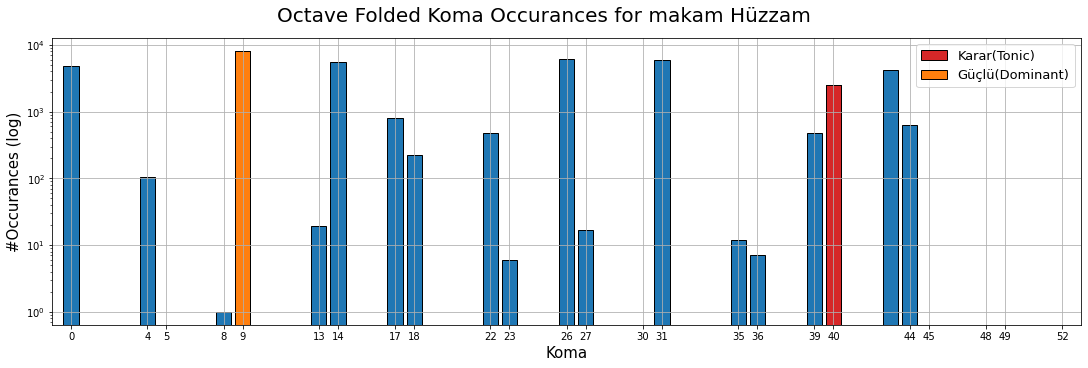

In [9]:
# store aggregate histograms for pieces belonging to makam
perde_histograms = defaultdict(Counter)
for makam, pieces in subset.items():
    for piece in pieces:
        perdeler = get_notes(piece, remove_rests=True)
        perdeler=perdeler%53 # octave fold
        perde_histograms[makam] += Counter(perdeler) # count each perde

# Plot for a single makam        
makam='Hüzzam'
perde_hist=perde_histograms[makam]
komalar, counts = list(perde_hist.keys()), list(perde_hist.values())
tonic=TONICS[makam] # Plot makam information
dominants=[AEU_PERDE[dom]%53 for dom in DOMINANTS[makam]] # Get all dominants in kommas, fold to octave
dominant_counts=[perde_hist[d] for d in dominants]
fig,ax = plt.subplots(figsize=(15, 5),constrained_layout=True)
fig.suptitle(f'Octave Folded Koma Occurances for makam {makam}',fontsize=20)
ax.bar(komalar, counts, color='tab:blue', edgecolor='k')
ax.bar(tonic, perde_hist[tonic], color='tab:red', label='Karar(Tonic)', edgecolor='k')
ax.bar(dominants, dominant_counts, color='tab:orange', label='Güçlü(Dominant)', edgecolor='k')
ax.set_xticks(AEU_OCTAVE_KOMA)
ax.set_xlabel('Koma', fontsize=15)
ax.set_ylabel('#Occurances (log)', fontsize=15)
ax.set_yscale('log')
ax.set_xlim([-1,53])
ax.grid()
ax.legend(loc=1, fontsize=13)
plt.show()

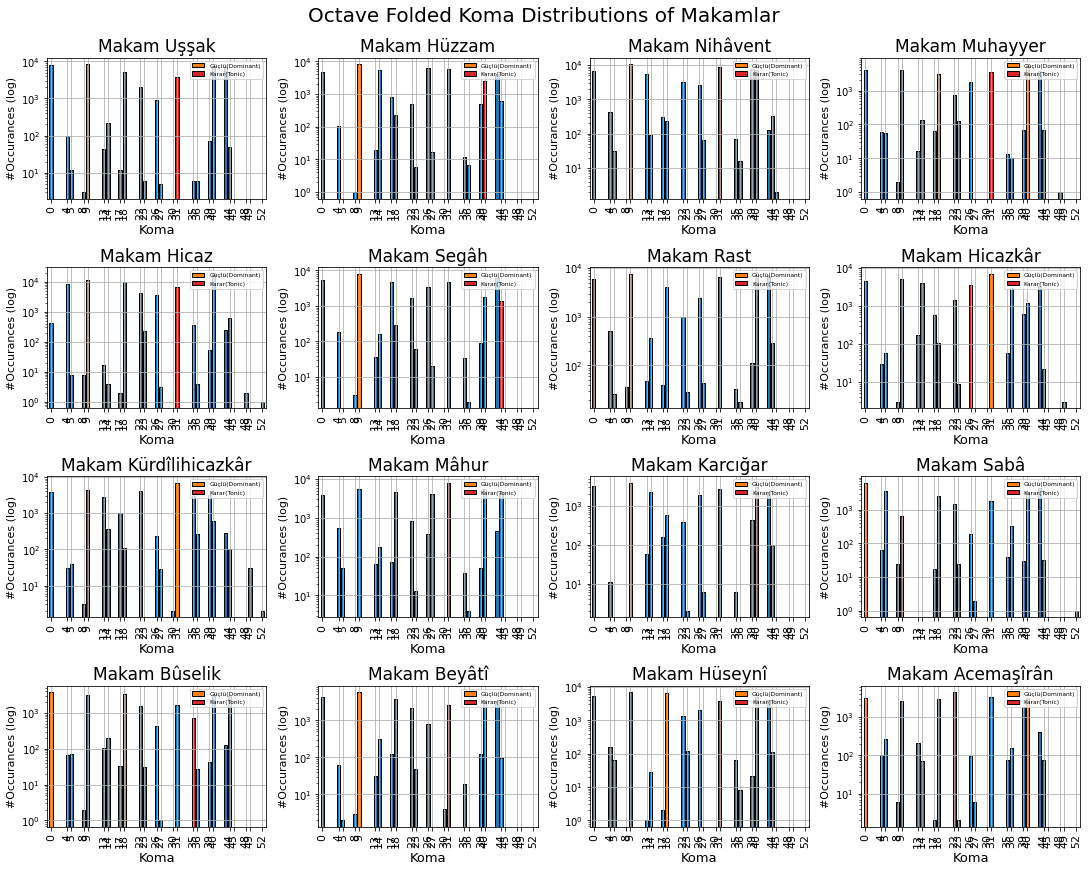

In [10]:
# Plot for all makamlar in our subset
fig, axs = plt.subplots(4, 4, figsize = (15, 12),constrained_layout=True)
fig.suptitle('Octave Folded Koma Distributions of Makamlar', fontsize=20)
for i,(makam,perde_hist) in enumerate(perde_histograms.items()):
    tonic=TONICS[makam]
    komalar, counts = list(perde_hist.keys()), list(perde_hist.values())
    dominants=[AEU_PERDE[dom]%53 for dom in DOMINANTS[makam]] 
    dominant_counts=[perde_hist[d] for d in dominants]
    axs[i//4][i%4].bar(komalar, counts, color='tab:blue', edgecolor='k')
    axs[i//4][i%4].bar(dominants, dominant_counts, color='tab:orange', edgecolor='k', label='Güçlü(Dominant)')
    axs[i//4][i%4].bar(tonic, perde_hist[tonic], color='tab:red', edgecolor='k', label='Karar(Tonic)')
    axs[i//4][i%4].set_title(f'Makam {makam}',fontsize=17)
    axs[i//4][i%4].set_xticks(AEU_OCTAVE_KOMA)
    axs[i//4][i%4].tick_params(axis='x', which='both', rotation=90, labelsize=11)
    axs[i//4][i%4].set_xlabel('Koma', fontsize=13)
    axs[i//4][i%4].set_ylabel('#Occurances (log)', fontsize=11)
    axs[i//4][i%4].set_yscale('log')
    axs[i//4][i%4].set_xlim([-1,53])
    axs[i//4][i%4].grid()
    axs[i//4][i%4].legend(loc=1,fontsize=6)
plt.show()

### --> Melodic Contour

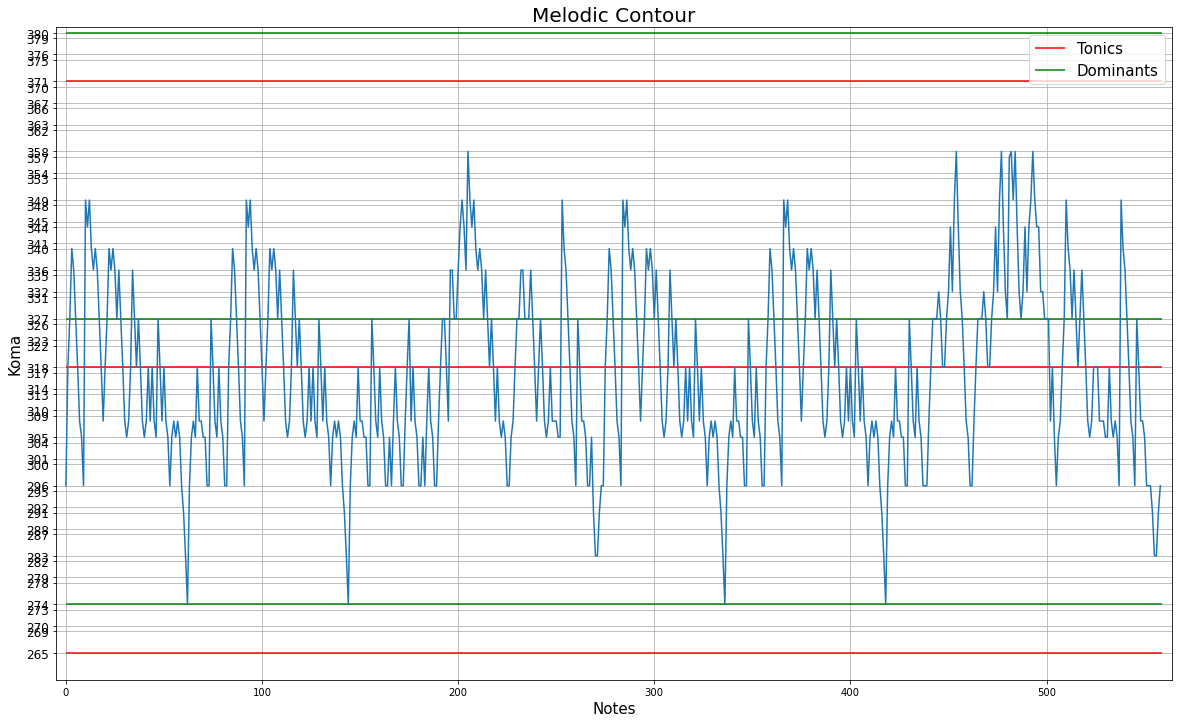

In [13]:
# Return each perde without the rests
makam='Rast'
melodic_contour = get_notes(subset[makam][0], remove_rests=True)
tonic=TONICS[makam]
dominants=[AEU_PERDE[dom]%53 for dom in DOMINANTS[makam]]
# Determine the octave display range
lower_oct=min(melodic_contour)//53
higher_oct=max(melodic_contour)//53
if max(melodic_contour)%53:
    higher_oct+=1
tonic_positions=53*np.arange(lower_oct,higher_oct+1)
fig,ax = plt.subplots(figsize=(20, 12))
ax.plot(melodic_contour)
ax.hlines(tonic+tonic_positions, 0, len(melodic_contour), 'r', label='Tonics')
ax.hlines([d+o for d in dominants for o in tonic_positions], 0, len(melodic_contour), 'g', label='Dominants')
ax.set_title("Melodic Contour", fontsize=20)
ax.set_xlabel('Notes', fontsize=15)
ax.set_ylabel('Koma', fontsize=15)
ax.set_yticks([o+x for x in AEU_OCTAVE_KOMA for o in tonic_positions])
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim([tonic_positions[0]-5,tonic_positions[-1]+10])
ax.set_xlim([-5,len(melodic_contour)+5])
ax.legend(loc=1, fontsize=15)
ax.grid()
plt.show()

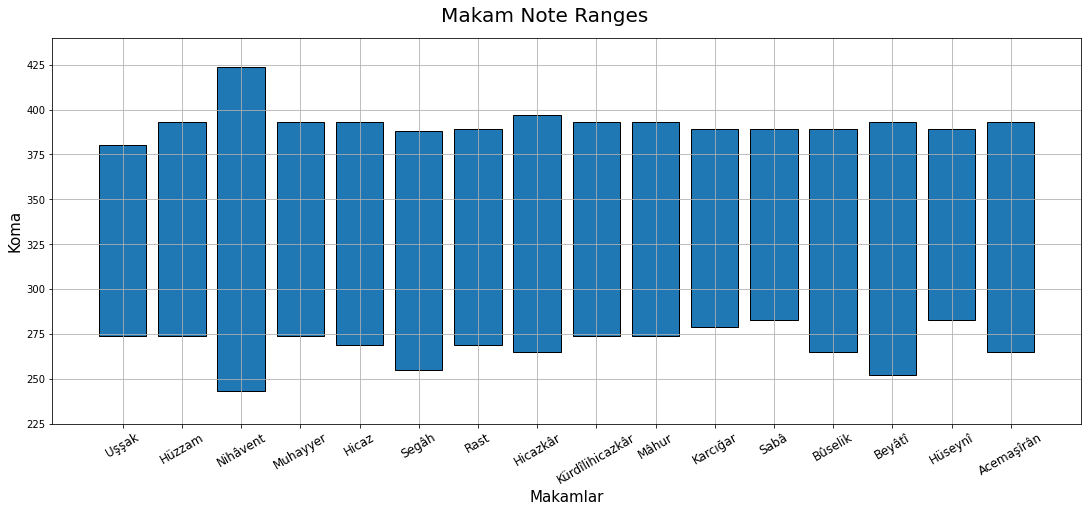

In [14]:
# Find the range of notes played for each makam
makam_notes=defaultdict(list)
for makam, pieces in subset.items():
    for piece in pieces:
        notes=get_notes(piece, remove_rests=True)
        makam_notes[makam].extend(notes)
note_extrema={}
for makam, lst in makam_notes.items():
    notes=np.unique(lst)
    note_extrema[makam]=(notes.max(),notes.min())
diffs=[M-m for (M,m) in note_extrema.values()]
mins=[m for (_,m) in note_extrema.values()]

# Plot for all makamlar
fig,ax=plt.subplots(figsize=(15,7), constrained_layout=True)
fig.suptitle('Makam Note Ranges', fontsize=20)
ax.bar(note_extrema.keys(), diffs, bottom=mins, edgecolor='k', width=0.8)
ax.tick_params(axis='x', labelsize=12, rotation=30)
ax.grid()
ax.set_ylim([225,440])
ax.set_ylabel('Koma',fontsize=15)
ax.set_xlabel('Makamlar',fontsize=15)
plt.show()    

### Return to Tonic Durations

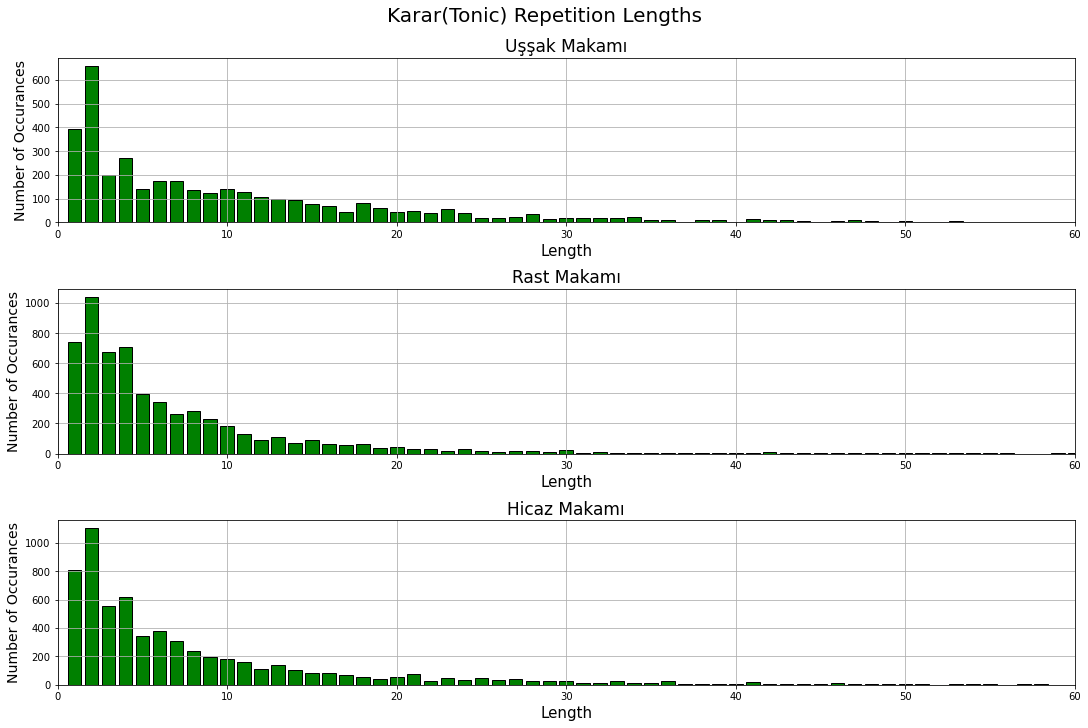

In [15]:
# Find out the number of notes that it takes between 2 tonic appearances
return_to_tonic_durations=defaultdict(Counter)
for makam, makam_dct in subset.items():
    for composition in makam_dct:
        durations=find_return_to_tonic_durations(composition)
        return_to_tonic_durations[makam]+=Counter(durations.reshape(-1))
        
# Plot for Uşşak,Rast,Hicaz        
fig,ax=plt.subplots(3,1,figsize=(15,10), constrained_layout=True)
fig.suptitle(f'Karar(Tonic) Repetition Lengths', fontsize=20)
for i,makam in enumerate(['Uşşak','Rast','Hicaz']):
    dct=return_to_tonic_durations[makam]
    ax[i].bar(dct.keys(),dct.values(),edgecolor='k',color='g')
    ax[i].set_xlim([-1, max(dct.keys())])
    ax[i].set_title(f'{makam} Makamı', fontsize=17)
    ax[i].set_xlabel('Length', fontsize=15)
    ax[i].set_ylabel('Number of Occurances', fontsize=14)
    ax[i].grid()
    ax[i].set_xlim([0,60]) # Arbitrary cut, for better visualization
plt.show()        

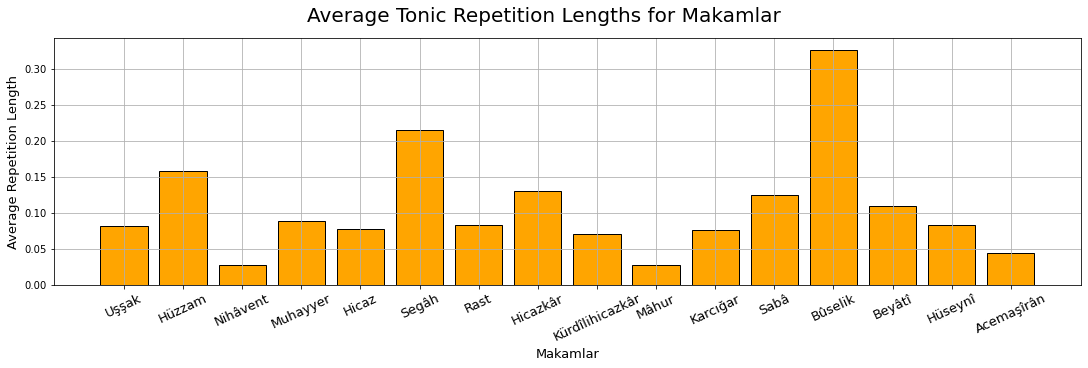

In [16]:
# Calculate the average lengths by total composition length
av_return_to_tonic_durations={}
for makam,counter in return_to_tonic_durations.items():
    total_length=0
    for piece in subset[makam]: # get the total composition length
        total_length+=len(piece['notes'])
    av_return_to_tonic_durations[makam]=sum(counter)/total_length
    
fig,ax=plt.subplots(figsize=(15,5), constrained_layout=True)
fig.suptitle('Average Tonic Repetition Lengths for Makamlar', fontsize=20)
ax.bar(av_return_to_tonic_durations.keys(),av_return_to_tonic_durations.values(),edgecolor='k',color='orange')
ax.tick_params(axis='x', labelsize=13, rotation=25)
ax.set_xlabel('Makamlar', fontsize=13)
ax.set_ylabel('Average Repetition Length', fontsize=13)
ax.grid()
plt.show()

### Return to Tonic Pitch Ranges

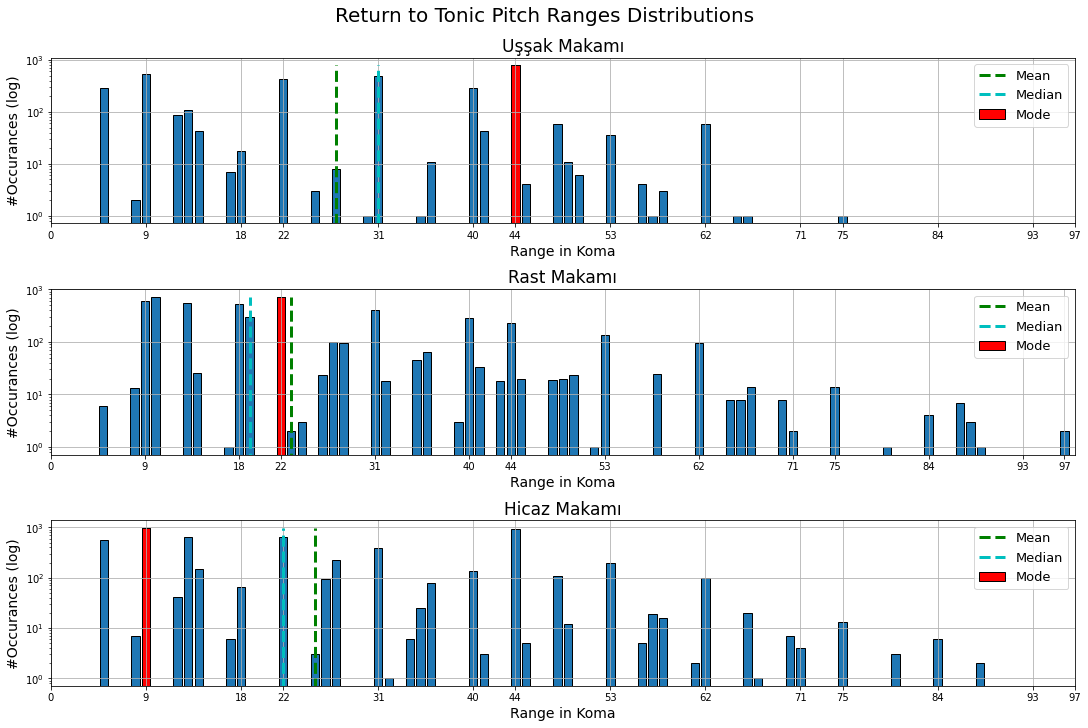

In [17]:
# Find the pitch ranges between two tonic appearances for each makam
return_to_tonic_ranges=defaultdict(list)
for makam, makam_dct in subset.items():
    for piece in makam_dct:
        ranges=find_return_to_tonic_ranges(piece)
        return_to_tonic_ranges[makam].extend(ranges) # create a simple list

# Plot for Uşşak, Rast, Hicaz
fig,ax=plt.subplots(3,1,figsize=(15,10), constrained_layout=True)
fig.suptitle(f'Return to Tonic Pitch Ranges Distributions', fontsize=20)
for i,makam in enumerate(['Uşşak','Rast','Hicaz']):
    ranges=return_to_tonic_ranges[makam]
    bins,values=np.unique(ranges, return_counts=True)
    # Calculate statistics
    mean=int(np.mean(ranges))
    mode, count =stats.mode(ranges)
    median=int(np.median(ranges))
    mode_indicator=np.zeros_like(bins)
    mode_indicator[np.where(bins==mode)]=count
    # Plot
    ax[i].bar(bins,values, edgecolor='k')  
    ax[i].bar(bins, mode_indicator, color='r', edgecolor='k', label='Mode')
    ax[i].vlines(mean,0,count, linestyles='--', linewidths=3, color='g', label='Mean')
    ax[i].vlines(median,0,count, linestyles='--', linewidths=3, color='c', label='Median')
    ax[i].set_xlim([0, max(bins)+1])
    ax[i].set_xticks(list(PITCH_CLASS.values()) + [53+x for x in list(PITCH_CLASS.values())])
    ax[i].set_yticks(np.arange(0,values.max(),100))
    ax[i].set_title(f'{makam} Makamı', fontsize=17)
    ax[i].set_xlabel('Range in Koma', fontsize=14)
    ax[i].set_ylabel('#Occurances (log)', fontsize=14)
    ax[i].legend(loc=1, fontsize=13)
    ax[i].set_yscale('log')
    ax[i].grid()
plt.show()

**Comparison Between all Makamlar in our subset**

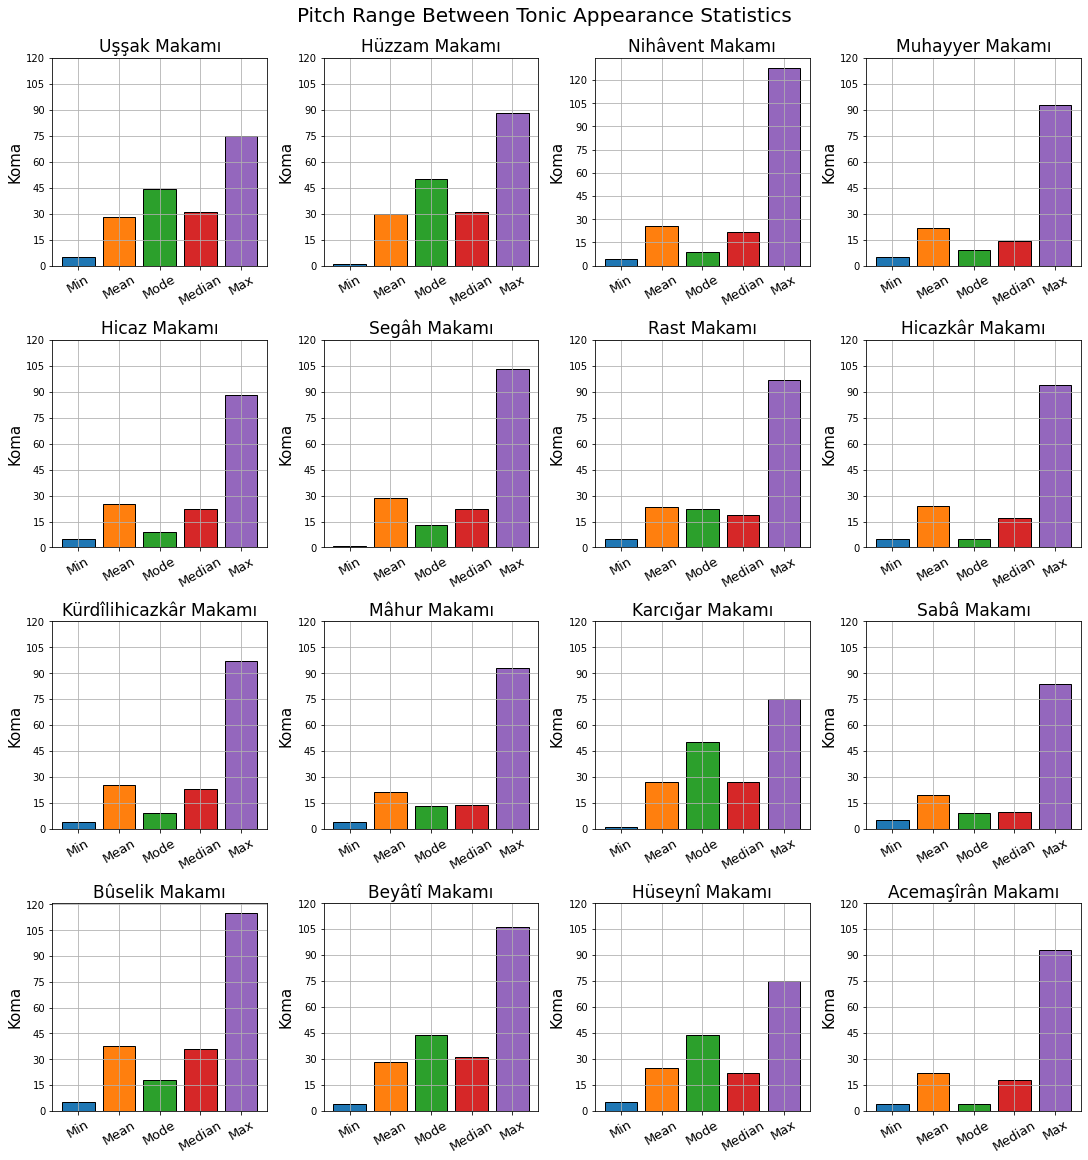

In [18]:
fig, axs = plt.subplots(4, 4, figsize = (15, 16),constrained_layout=True)
fig.suptitle('Pitch Range Between Tonic Appearance Statistics', fontsize=20)
_max_=0
for i,(makam,lst) in enumerate(return_to_tonic_ranges.items()):
    # Calculate statistics
    mean=np.mean(lst)
    mode, count =stats.mode(lst)
    median=np.median(lst)
    min_=np.min(lst)
    max_=np.max(lst)
    if max_>_max_:
        _max_=max_  
    # Display in a single plot
    axs[i//4][i%4].bar('Min', min_, edgecolor='k')
    axs[i//4][i%4].bar('Mean', mean, edgecolor='k')
    axs[i//4][i%4].bar('Mode', mode, edgecolor='k')
    axs[i//4][i%4].bar('Median', median, edgecolor='k')
    axs[i//4][i%4].bar('Max', max_, edgecolor='k')
    axs[i//4][i%4].set_title(f'{makam} Makamı', fontsize=17)
    axs[i//4][i%4].set_ylabel('Koma', fontsize=15)
    axs[i//4][i%4].tick_params(axis='x', which='major', labelsize=13, rotation=30)
    axs[i//4][i%4].grid()
# Ensure same ticks
for i in range(len(return_to_tonic_ranges)): 
    axs[i//4][i%4].set_yticks(np.arange(0,_max_+5,15))

### --> Interval Histogram

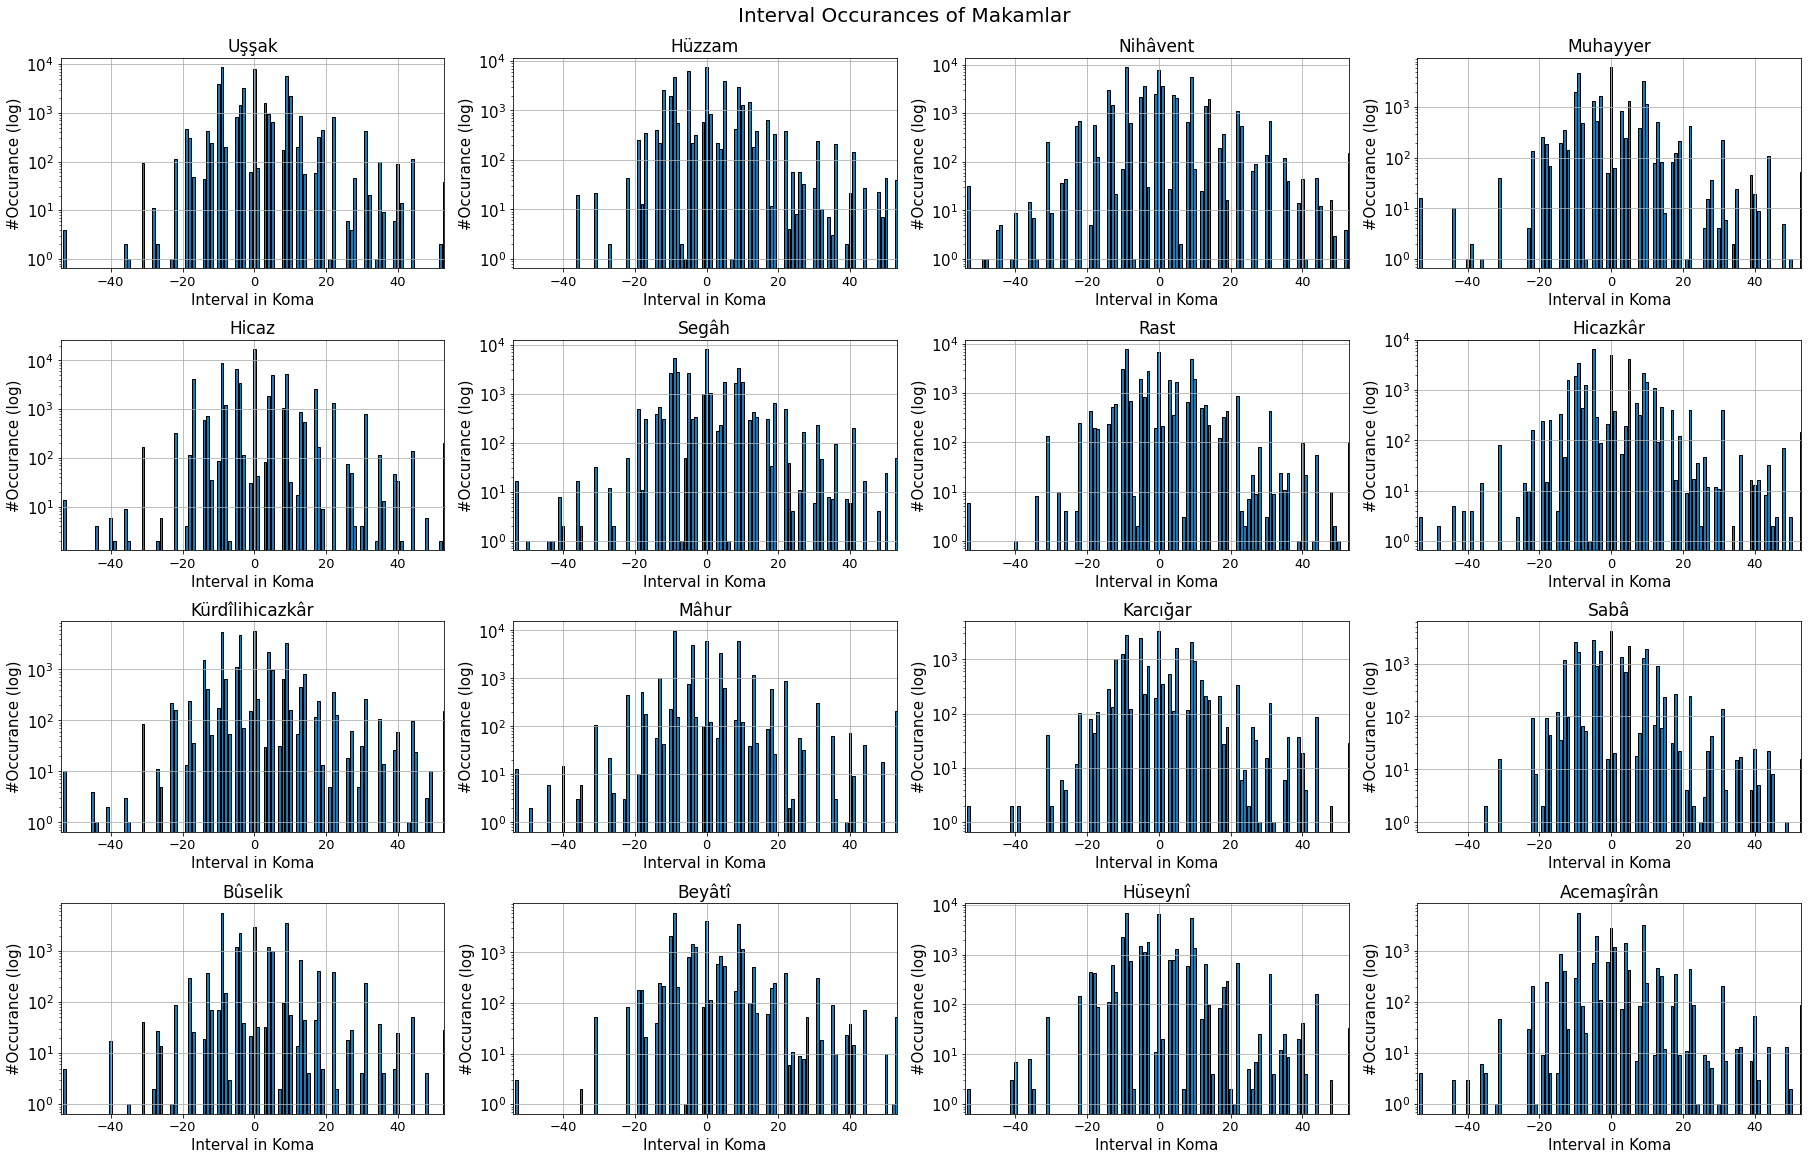

In [19]:
# Accumulate interval histograms for pieces belonging to each makam
interval_histograms = defaultdict(Counter)
for makam, pieces in subset.items():
    for piece in pieces:
        notes = get_notes(piece, remove_rests=True)
        # get consecutive differences -> intervals
        intervals = np.ediff1d(notes)
        # extract and add histogram
        interval_histograms[makam] += Counter(intervals)

# Plot for all makamlar
fig, axs = plt.subplots(4, 4, figsize = (25, 16), constrained_layout=True)
fig.suptitle('Interval Occurances of Makamlar', fontsize=20)
for i,(makam,counter) in enumerate(interval_histograms.items()):
    axs[i//4][i%4].bar(x=list(counter.keys()), height=list(counter.values()), edgecolor='k')
    axs[i//4][i%4].set_title(makam, fontsize=17)
    axs[i//4][i%4].set_xlim([-54,53]) # 2 Octaves is enough
    axs[i//4][i%4].set_ylabel('#Occurance (log)', fontsize=15)
    axs[i//4][i%4].set_xlabel('Interval in Koma', fontsize=15)
    axs[i//4][i%4].tick_params(axis='x', which='major', labelsize=13)
    axs[i//4][i%4].tick_params(axis='y', which='major', labelsize=15)
    axs[i//4][i%4].set_yscale('log')
    axs[i//4][i%4].grid()

### --> Position of Tonic in Measure


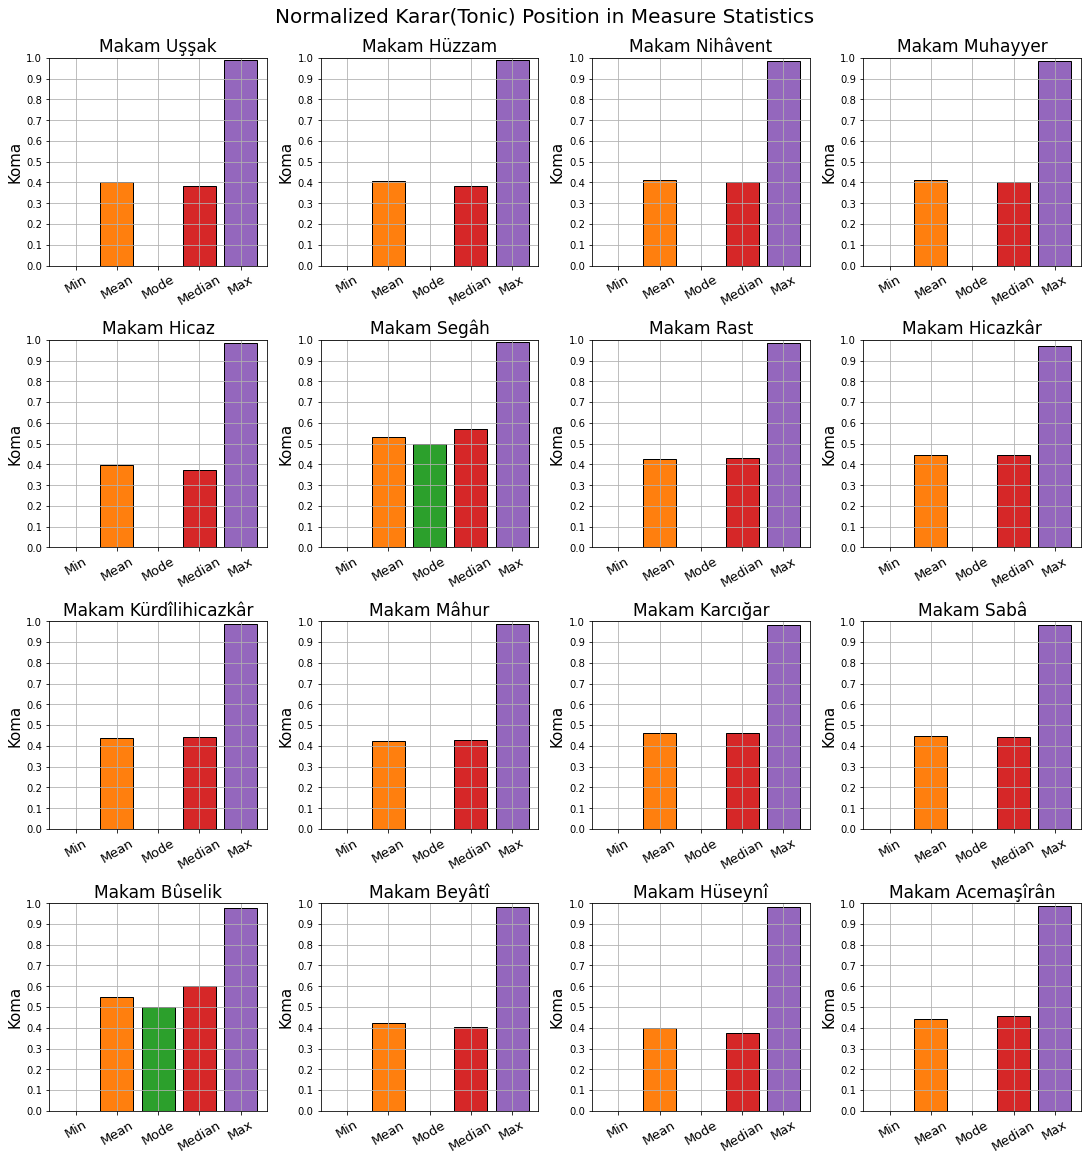

In [20]:
# Create normalized tonic position histograms for each makam
tonic_positions = defaultdict(list)
for makam, pieces in subset.items():
    for piece in pieces:
        measure_changes = get_measure_change_indices(piece)
        for i in range(len(measure_changes[:-1])):
            # find only the notes of current measure
            measure_notes = piece['notes'][measure_changes[i]:measure_changes[i+1],3].astype(int)
            # Find out tonic indices, normalize with measure length
            positions=np.where(measure_notes%53==TONICS[makam])[0]/len(measure_notes)
            tonic_positions[makam].extend(list(positions))

# Plot for all makamlar in a single plot
fig, axs = plt.subplots(4, 4, figsize = (15, 16),constrained_layout=True)
fig.suptitle('Normalized Karar(Tonic) Position in Measure Statistics', fontsize=20)
_max_=0
for i,(makam,lst) in enumerate(tonic_positions.items()):
    # Calculate statistics
    mean=np.mean(lst)
    mode, count =stats.mode(lst)
    median=np.median(lst)
    min_=np.min(lst)
    max_=np.max(lst)
    if max_>_max_:
        _max_=max_
    # Display in a single plot
    axs[i//4][i%4].bar('Min', min_, edgecolor='k')
    axs[i//4][i%4].bar('Mean', mean, edgecolor='k')
    axs[i//4][i%4].bar('Mode', mode, edgecolor='k')
    axs[i//4][i%4].bar('Median', median, edgecolor='k')
    axs[i//4][i%4].bar('Max', max_, edgecolor='k')
    axs[i//4][i%4].set_title(f'Makam {makam}', fontsize=17)
    axs[i//4][i%4].set_ylabel('Koma', fontsize=15)
    axs[i//4][i%4].tick_params(axis='x', which='major', labelsize=13, rotation=30)
    axs[i//4][i%4].grid()
# Ensure same ticks
for i in range(len(tonic_positions)):
    axs[i//4][i%4].set_ylim([0,1])
    axs[i//4][i%4].set_yticks(np.arange(0,_max_+0.1,0.1))            